# Clustering

Group the data by common properties

In [1]:
import pandas as pd

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_excel('cars.xls')
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


### Reminders

Regression: $r^{2}$, rmse (higher is better)
<br>
Classification: Accuracy, F1 Score, Classification report, confusion matrix
<br>
Clustering: Silhuette score (lower is better )

In [3]:
x = df[['Price', 'Mileage', 'Cylinder']]
x.head()

,Price,Mileage,Cylinder
0,17314.103129,8221,6
1,17542.036083,9135,6
2,16218.847862,13196,6
3,16336.913140,16342,6
4,16339.170324,19832,6


In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [5]:
model = KMeans(4)
model = model.fit(x)
pred = model.predict(x)

#### Add a new column that shows to which group each value belongs

In [6]:
x['cluster'] = pred
x.head()

,Price,Mileage,Cylinder,cluster
0,17314.103129,8221,6,2
1,17542.036083,9135,6,2
2,16218.847862,13196,6,2
3,16336.913140,16342,6,2
4,16339.170324,19832,6,1


In [7]:
silhouette_score(x, pred)

0.41328609838381997

In [8]:
import matplotlib.pyplot as plt

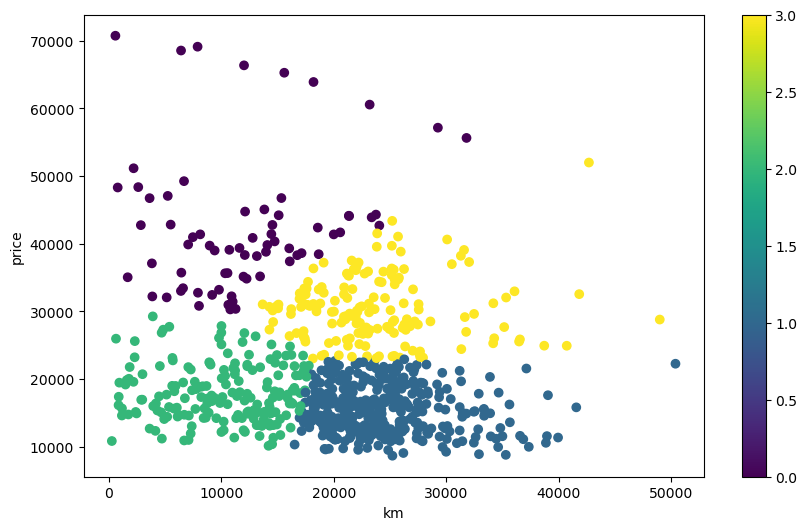

In [9]:
plt.figure(figsize=(10, 6))

plt.scatter(x.Mileage, x.Price, c=pred)
plt.colorbar()
plt.xlabel('km')
plt.ylabel('price');

In [10]:
wcss = []
ss = []

for i in range(2, 10):
    model = KMeans(n_clusters=i)
    model = model.fit(x)
    tahmin = model.predict(x)
    ss1 = silhouette_score(x, tahmin)
    ss.append(ss1)
    print(ss1)
    wcss.append(model.inertia_)

0.45114541767447686
0.4132108635490875
0.41328609838381997
0.35465903089329465
0.37109724484859397
0.3571375233375218
0.3401770854043245
0.35028712401064177


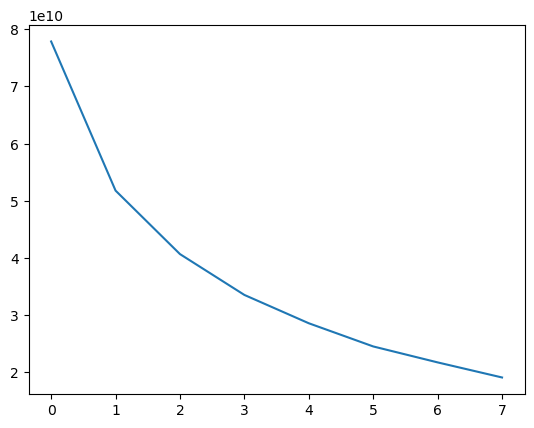

In [11]:
plt.plot(wcss);

In [12]:
import seaborn as sns

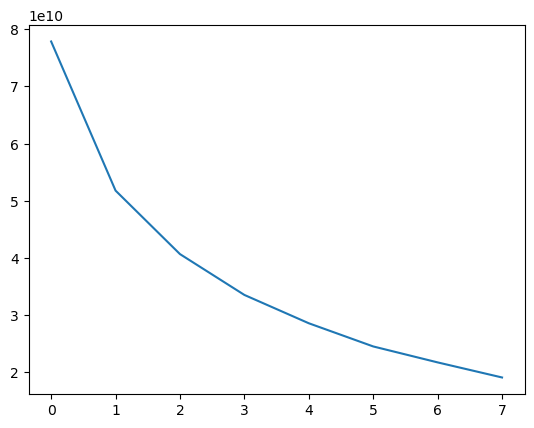

In [13]:
sns.lineplot(wcss);

In [14]:
from yellowbrick.cluster import KElbowVisualizer

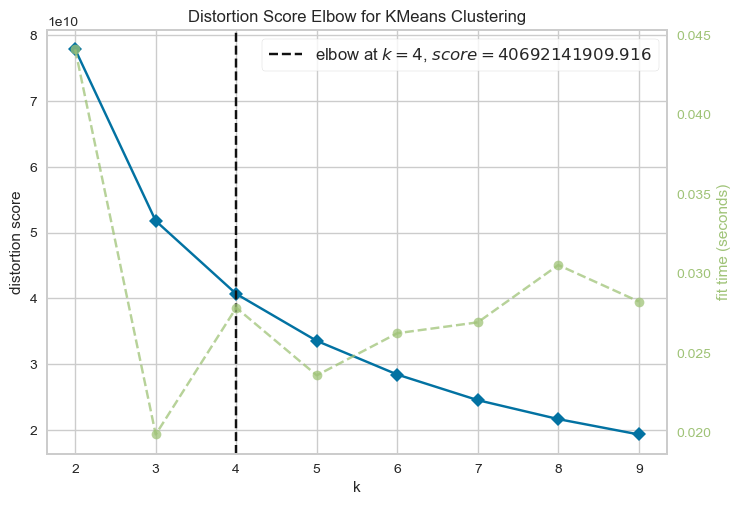

In [15]:
km = KMeans()
vis = KElbowVisualizer(km, k=(2, 10))
vis.fit(x)
vis.show();

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [17]:
data = linkage(x, method='ward', metric='euclidean')

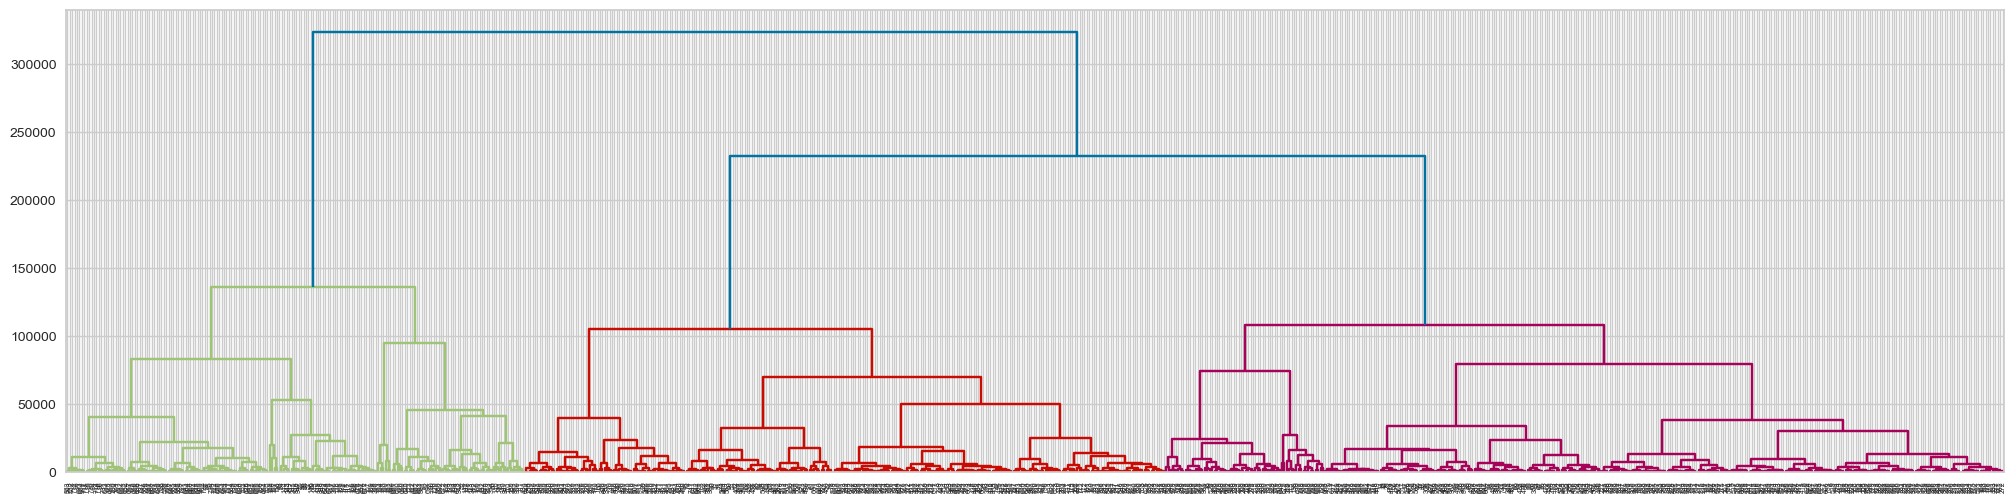

In [18]:
plt.figure(figsize=(25, 6))
dendrogram(data);

In [19]:
df = pd.read_csv('Billionaires.csv')

In [20]:
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


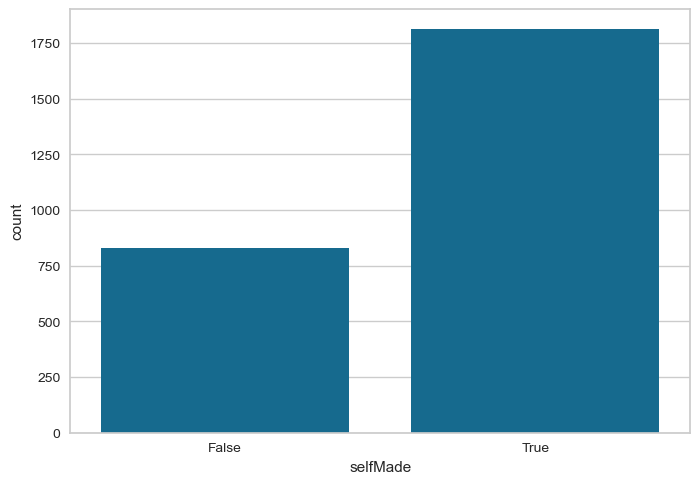

In [21]:
sns.countplot(x=df['selfMade']);

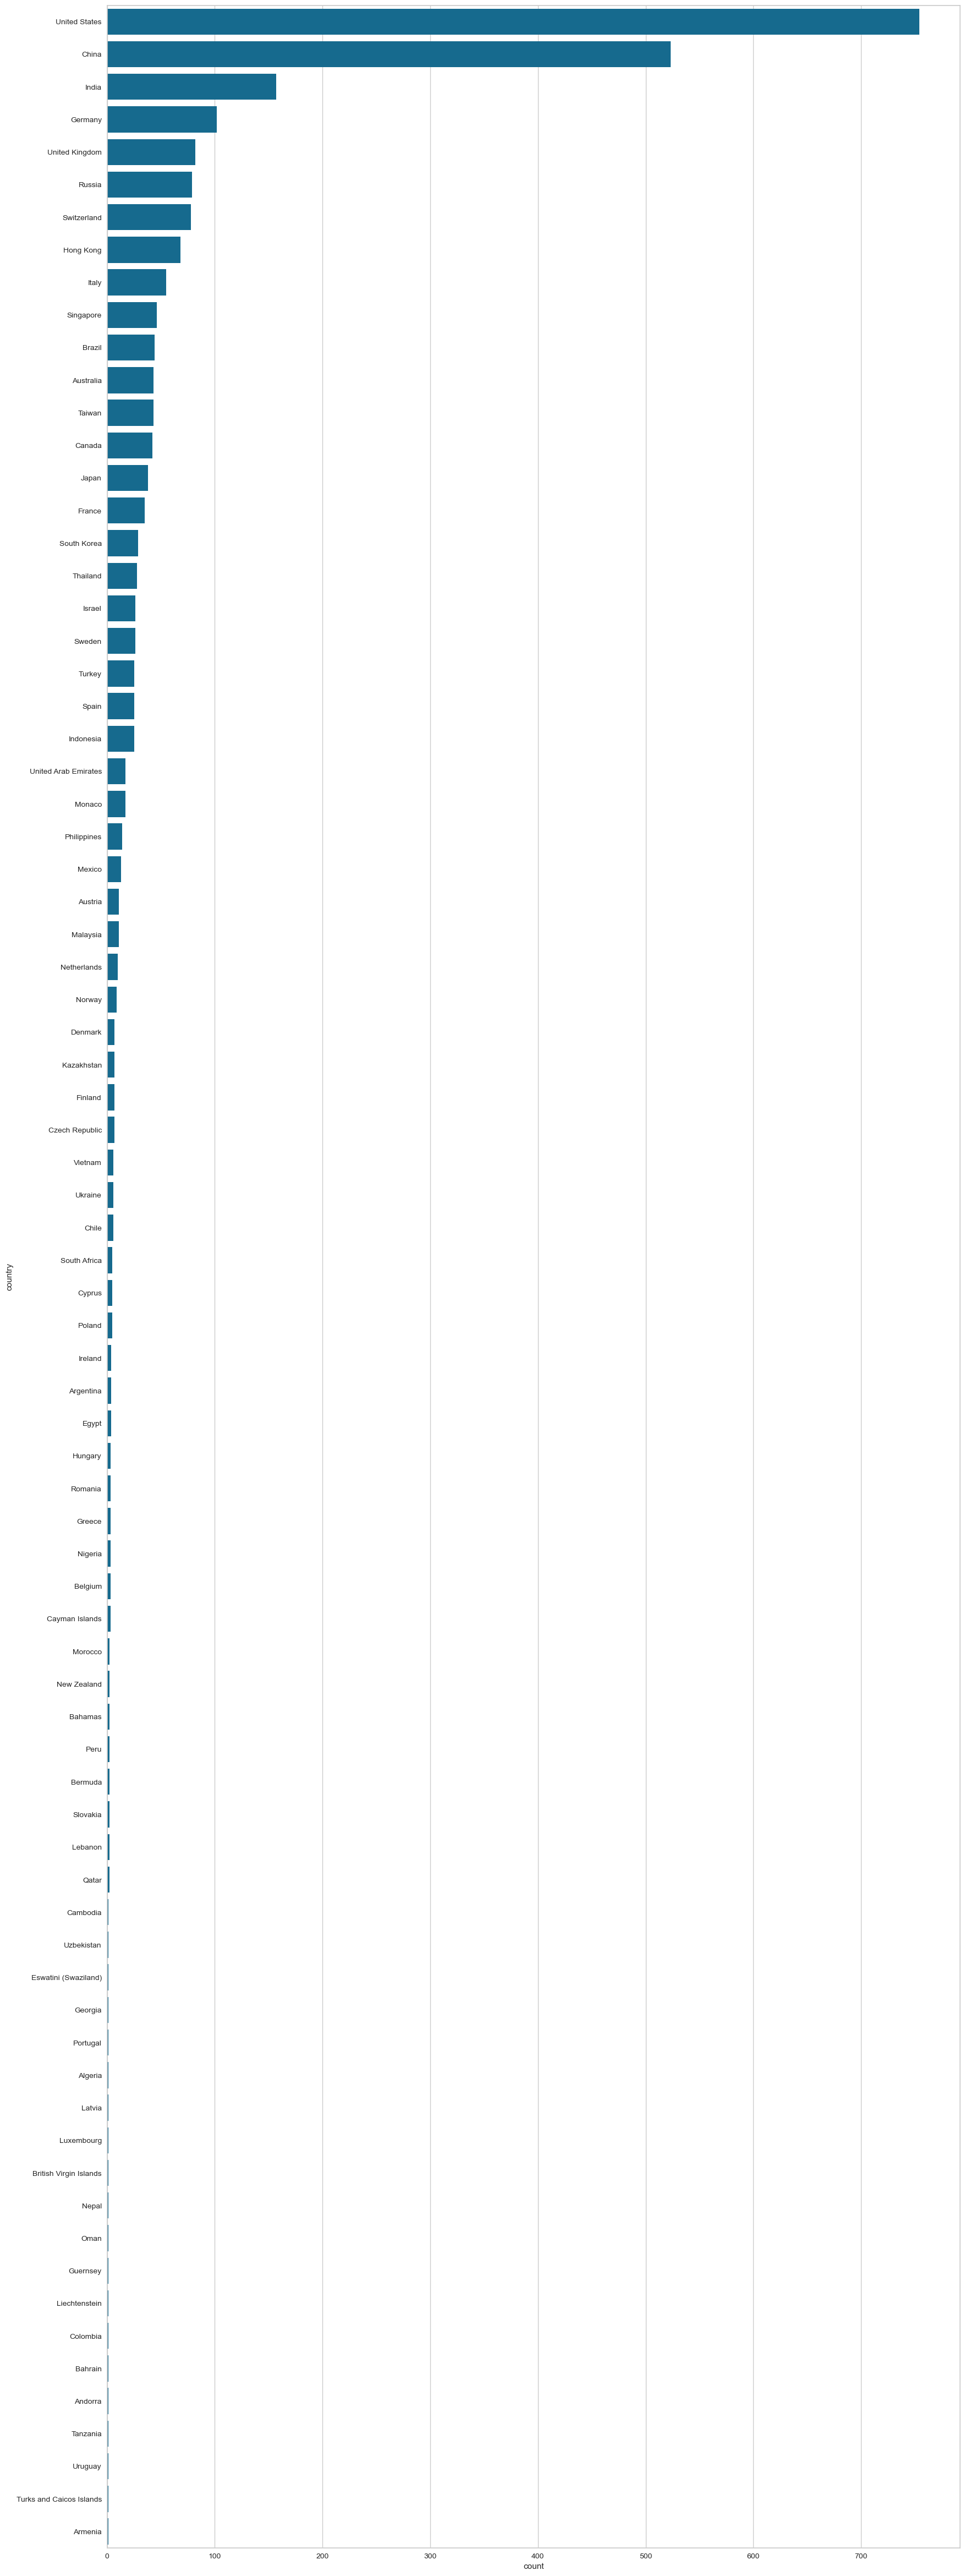

In [22]:
plt.figure(figsize=(20, 60))
ydf = df['country'].value_counts().sort_values(ascending=False)
sns.countplot(y=df['country'], order=ydf.index);

#### Lets see the billionares of Turkey

In [23]:
tr = df[df['country'] == 'Turkey']
tr.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
498,497,5300,Manufacturing,Ibrahim Erdemoglu,60.0,Turkey,Istanbul,Carpet,Manufacturing,Turkey,...,15.2,"$754,411,708,203",23.9,93.2,77.4,17.9,42.3,83429615.0,38.963745,35.243322
548,534,5000,Food & Beverage,Murat Ulker,64.0,Turkey,Istanbul,Food,Food & Beverage,Turkey,...,15.2,"$754,411,708,203",23.9,93.2,77.4,17.9,42.3,83429615.0,38.963745,35.243322
582,580,4700,Manufacturing,Ali Erdemoglu,63.0,Turkey,Istanbul,Carpet,Manufacturing,Turkey,...,15.2,"$754,411,708,203",23.9,93.2,77.4,17.9,42.3,83429615.0,38.963745,35.243322
982,982,3000,Diversified,Semahat Sevim Arsel,94.0,Turkey,Istanbul,Diversified,Diversified,Turkey,...,15.2,"$754,411,708,203",23.9,93.2,77.4,17.9,42.3,83429615.0,38.963745,35.243322
1042,1027,2900,Diversified,Ipek Kirac,38.0,Turkey,Istanbul,Diversified,Diversified,Turkey,...,15.2,"$754,411,708,203",23.9,93.2,77.4,17.9,42.3,83429615.0,38.963745,35.243322


In [24]:
final_worth = tr['finalWorth'].value_counts().sort_values(ascending=False)

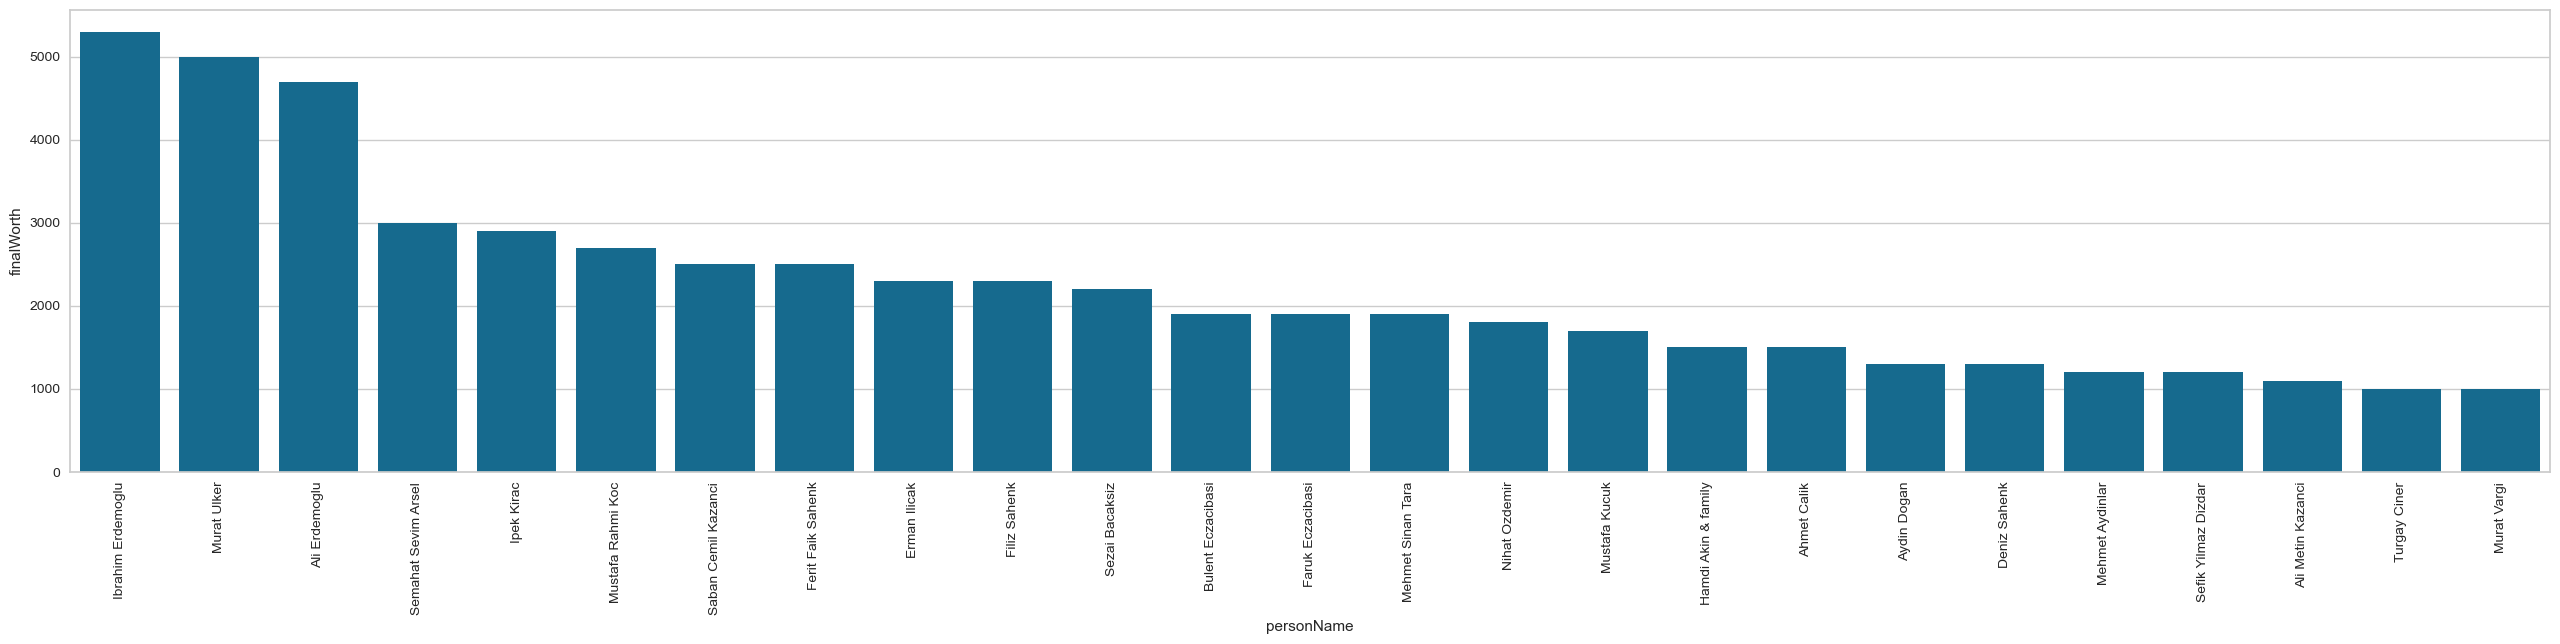

In [25]:
plt.figure(figsize=(32, 6))
sns.barplot(x=tr['personName'], y=tr['finalWorth'])
plt.xticks(rotation=90);